<a href="https://colab.research.google.com/github/4nchez/Colab-Jupiter/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
TensorFlow version :  2.3.0
Keras version :  2.4.3


In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


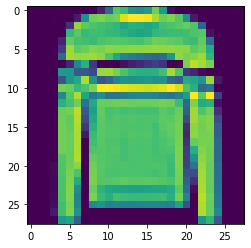

In [17]:
# 학습 셋 크기(shape) - 이미지 크기가 28x28 인 60,000 개의 학습 이미지 데이터, 60,000 개의 레이블
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습 셋과 테스트 셋의 데이터 개수
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9

# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 5
# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]
# 레이블 출력해 봅니다. 예를들어 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

In [18]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [19]:
# 학습 데이터 셋을 학습 / 평가 셋으로 나눈다. (# 학습 셋: 55,000, 검증 셋: 5000)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# 레이블에 원-핫 인코딩 적용 
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [ ]:
model = tf.keras.Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6075 - accuracy: 0.7759
Epoch 00001: val_loss improved from inf to 0.38604, saving model to model.weights.best.hdf5
860/860 [==============================] - 4s 4ms/step - loss: 0.6075 - accuracy: 0.7759 - val_loss: 0.3860 - val_accuracy: 0.8610
Epoch 2/10
849/860 [============================>.] - ETA: 0s - loss: 0.4177 - accuracy: 0.8479
Epoch 00002: val_loss improved from 0.38604 to 0.32437, saving model to model.weights.best.hdf5
860/860 [==============================] - 3s 4ms/step - loss: 0.4178 - accuracy: 0.8478 - val_loss: 0.3244 - val_accuracy: 0.8860
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3769 - accuracy: 0.8630
Epoch 00003: val_loss improved from 0.32437 to 0.29861, saving model to model.weights.best.hdf5
860/860 [==============================] - 3s 4ms/step - loss: 0.3769 - accuracy: 0.8630 - val_loss: 0.2986 - val_accuracy: 0.8910
Epoch 4/10
851/860 [===============

In [ ]:
# 가장 높은 검증 정확도의 가중치 불러오기
model.load_weights('model.weights.best.hdf5')
# 테스트 셋을 통해 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9100000262260437


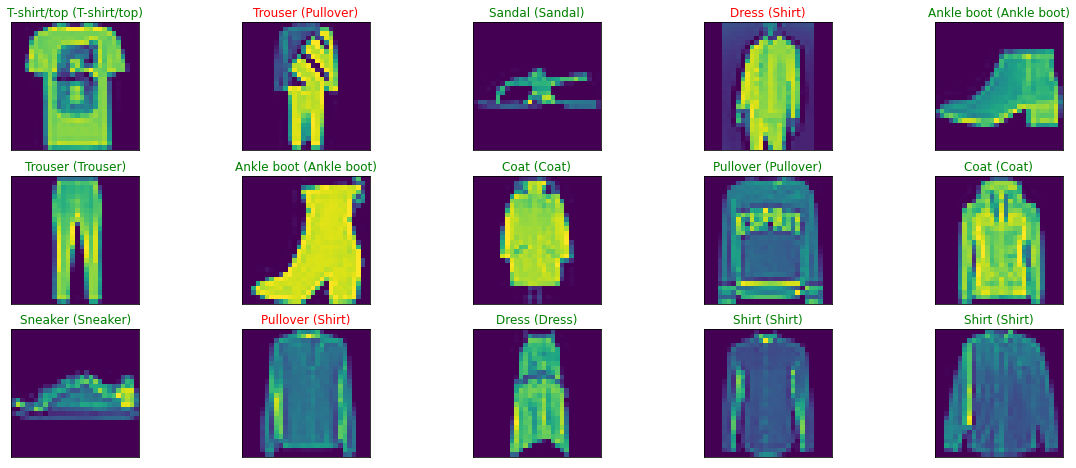

In [ ]:
y_hat = model.predict(x_test)

# 무작위 샘플로 15 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # 각각의 이미지를 보여줌
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
from tensorflow.keras.applications import VGG16
 
# NOTE: will download the weights for imagenet
vgg_base = VGG16(weights='imagenet',    # ImageNet 가중치 사용
                 include_top=False,     # Dense layers 사용 안함
                 input_shape=(224, 224, 3))
print(vgg_base.summary())

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("1 x_train shape:", x_train.shape, "x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape, "y_test shape:", y_test.shape)

# x_train=np.dstack([x_train] * 3)
# x_test=np.dstack([x_test]*3)
# print("2 x_train shape:", x_train.shape, "x_test shape:", x_test.shape)

# x_train = x_train.reshape(-1, 28,28,1)
# x_test= x_test.reshape (-1,28,28,1)
# print("3 x_train shape:", x_train.shape, "x_test shape:", x_test.shape)

# from keras.preprocessing.image import img_to_array, array_to_img
# x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
# x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
# print("4 x_train shape:", x_train.shape, "x_test shape:", x_test.shape)

# x_train=np.dstack([x_train] * 3)
# x_test=np.dstack([x_test]*3)
# print("5 x_train shape:", x_train.shape, "x_test shape:", x_test.shape)
# y_train=np.dstack([y_train] * 3)
# y_test=np.dstack([y_test]*3)
# y_train=y_train.reshape(180000,)
# y_test=y_test.reshape(30000,)
# print("y_train shape:", y_train.shape, "y_test shape:", y_test.shape)

1 x_train shape: (60000, 28, 28) x_test shape: (10000, 28, 28)
y_train shape: (60000,) y_test shape: (10000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


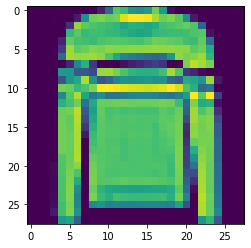

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9

# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 5
# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]
# 레이블 출력해 봅니다. 예를들어 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

In [45]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

_input = Input((28,28,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
# pool5  = MaxPooling2D((2, 2))(conv13)

# flat   = Flatten()(pool5)
flat   = Flatten()(conv13)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(10, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)
 
vgg16_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [46]:
vgg16_model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 7, 7, 128)       

In [47]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
vgg16_model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 1.0235 - accuracy: 0.5791
Epoch 00001: val_loss improved from inf to 0.56734, saving model to model.weights.best.hdf5
860/860 [==============================] - 33s 39ms/step - loss: 1.0235 - accuracy: 0.5791 - val_loss: 0.5673 - val_accuracy: 0.7716
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4849 - accuracy: 0.8235
Epoch 00002: val_loss improved from 0.56734 to 0.37070, saving model to model.weights.best.hdf5
860/860 [==============================] - 32s 37ms/step - loss: 0.4849 - accuracy: 0.8235 - val_loss: 0.3707 - val_accuracy: 0.8672
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.4035 - accuracy: 0.8619
Epoch 00003: val_loss improved from 0.37070 to 0.35910, saving model to model.weights.best.hdf5
860/860 [==============================] - 32s 37ms/step - loss: 0.4035 - accuracy: 0.8619 - val_loss: 0.3591 - val_accuracy: 0.8804
Epoch 4/10
859/860 [=========

In [48]:
# 가장 높은 검증 정확도의 가중치 불러오기
vgg16_model.load_weights('model.weights.best.hdf5')
# 테스트 셋을 통해 모델 평가
score = vgg16_model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.911300003528595


>Configuration | Test Acc | %
>:---|:---:|:---:|
>**Base Model**|0.9100000262260437 | 91.0%
>**vgg16 Model**|0.911300003528595 | 91.1%

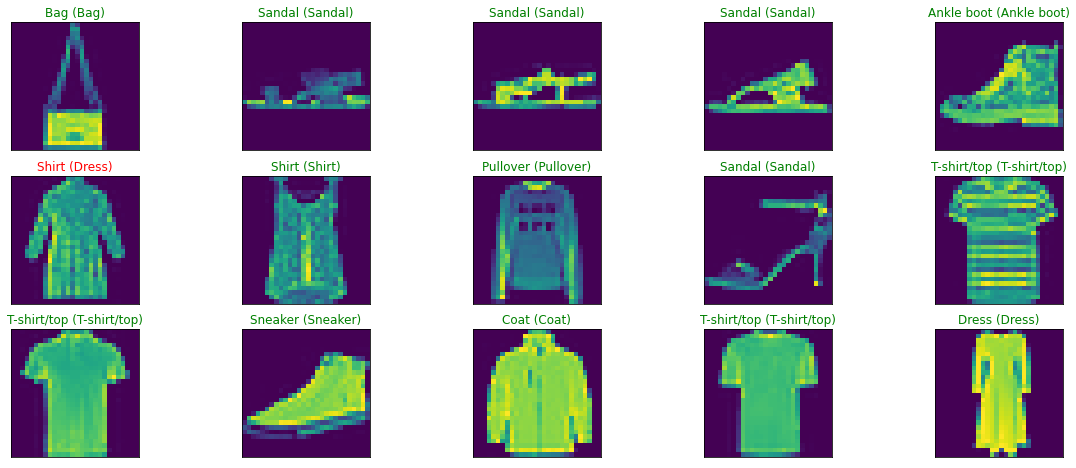

In [49]:
y_hat = vgg16_model.predict(x_test)

# 무작위 샘플로 15 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # 각각의 이미지를 보여줌
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))